In [1]:
install.packages("GGally")

library(tidyverse)
library(ggplot2)
library(tidyr)
library(GGally)

set.seed(1984)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘prettyunits’, ‘progress’, ‘reshape’

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
params <- c("p_1h", "p_10h", "p_100h", "p_herb", "p_1000h", "p_ws", "p_wd", "p_th", "p_hh", "p_adj")
# loads random individuals data set
individualHeader <- c(params, paste("p", seq(11,21), sep=""))
individuals <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals.txt', skip=1, col.names=individualHeader)
individuals <- subset(individuals, select=params)
individuals <- tibble::rowid_to_column(individuals, "id")
individuals$id <- (individuals$id - 1)

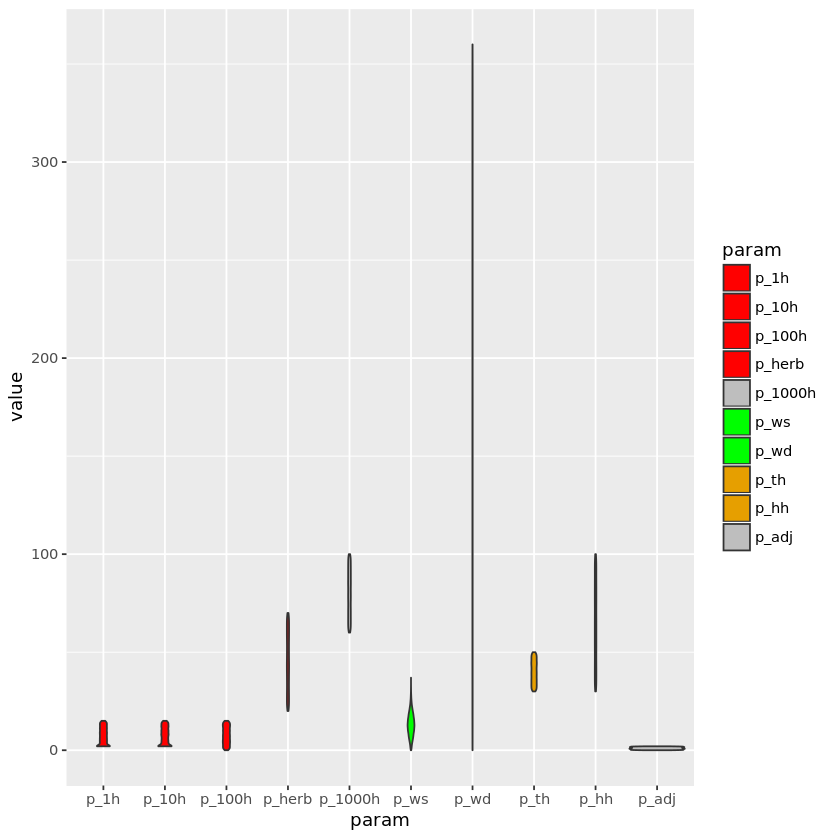

In [3]:
# plots a violin-like plot showing how gene values are distributed
fmsColor <- "red";
windColor <- "green";
weatherColor <- "#e69f00";
individuals.long <- gather(individuals, param, value, params, factor_key=TRUE)
p <- ggplot(individuals.long, aes(x=param, y=value, fill=param)) + geom_violin() # geom_boxplot() + geom_jitter()
p + scale_fill_manual(values=c(fmsColor, fmsColor, fmsColor, fmsColor, "grey", windColor, windColor, weatherColor, weatherColor,"grey"))

In [4]:
# loads individuals run results data set
individualsResults <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera.txt', header=T)
individualsResults <- subset(individualsResults, select=c("individual", paste("p", 0:9, sep=""), "runtime", "maxRSS"))
colnames(individualsResults) <- c("id", params, "runtime", "maxRSS")

In [5]:
# generates the multiple linear regression model for runtime based on individuals run results
runtimeModel <- lm(runtime ~ p_1h + p_10h + p_100h + p_herb + p_1000h + p_ws + p_wd + p_th + p_hh + p_adj, data=individualsResults)
summary(runtimeModel)$coefficient 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2526.555566,1090.7674956,2.3163099,2.074481e-02
p_1h,-38.153671,22.2287574,-1.7164104,8.639977e-02
p_10h,-61.671759,22.8766268,-2.6958414,7.140183e-03
p_100h,23.680559,21.6613802,1.0932156,2.745651e-01
p_herb,-8.632606,6.2405319,-1.3833125,1.668809e-01
p_1000h,-6.267491,7.9475479,-0.7886069,4.305306e-01
p_ws,116.093266,15.3705237,7.5529805,9.652600e-14
p_wd,-0.164670,0.8782081,-0.1875068,8.513017e-01
p_th,6.863383,15.9715322,0.4297260,6.674885e-01
p_hh,-28.319244,4.5154508,-6.2716316,5.329558e-10


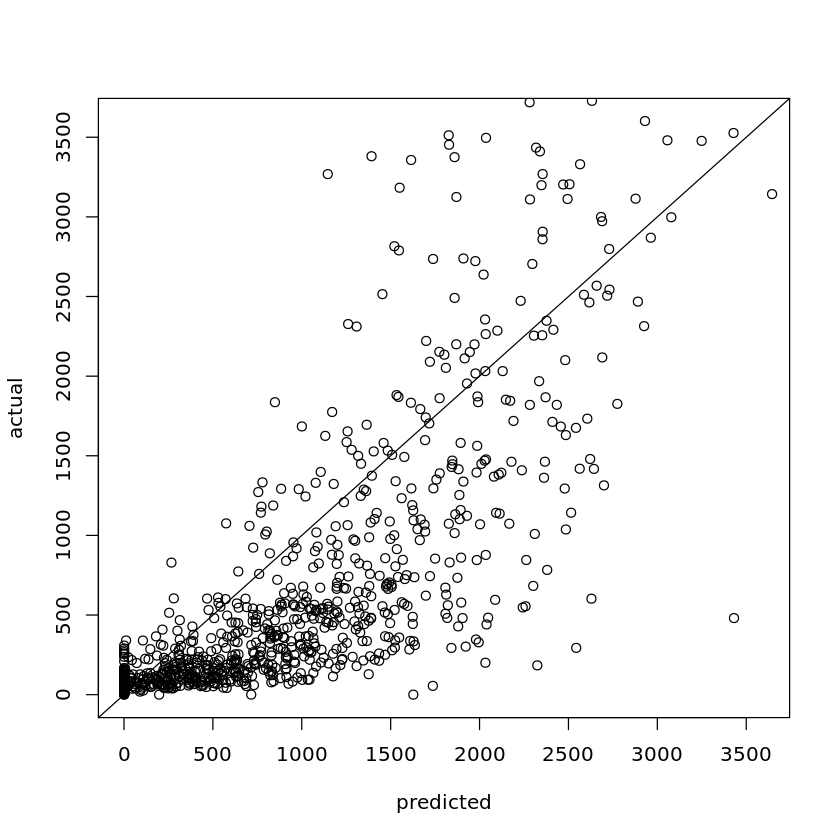

In [6]:
# analyses the quality of the prediction
ds <- individualsResults
ds$prediction <- predict(runtimeModel, head(individuals, 1001))
ds$prediction <- ifelse(ds$prediction<1, 1, ds$prediction)
plot(ds$prediction, ds$runtime, xlab="predicted", ylab="actual", xlim=c(0,3600), ylim=c(0,3600))
abline(a=0, b=1)

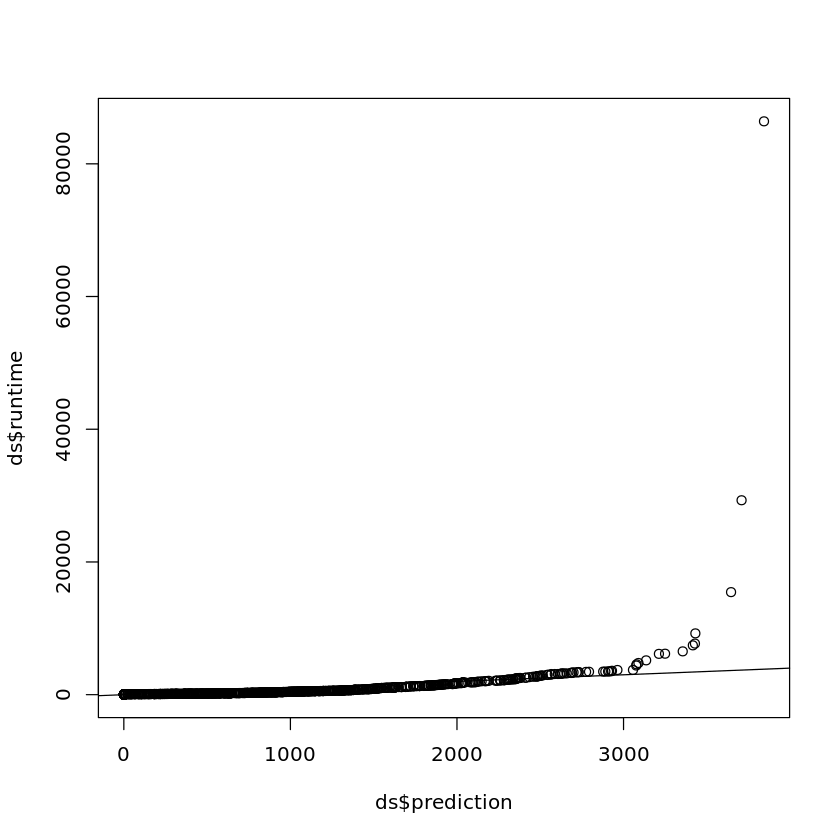

In [8]:
qqplot(ds$prediction, ds$runtime)
abline(a=0, b=1)

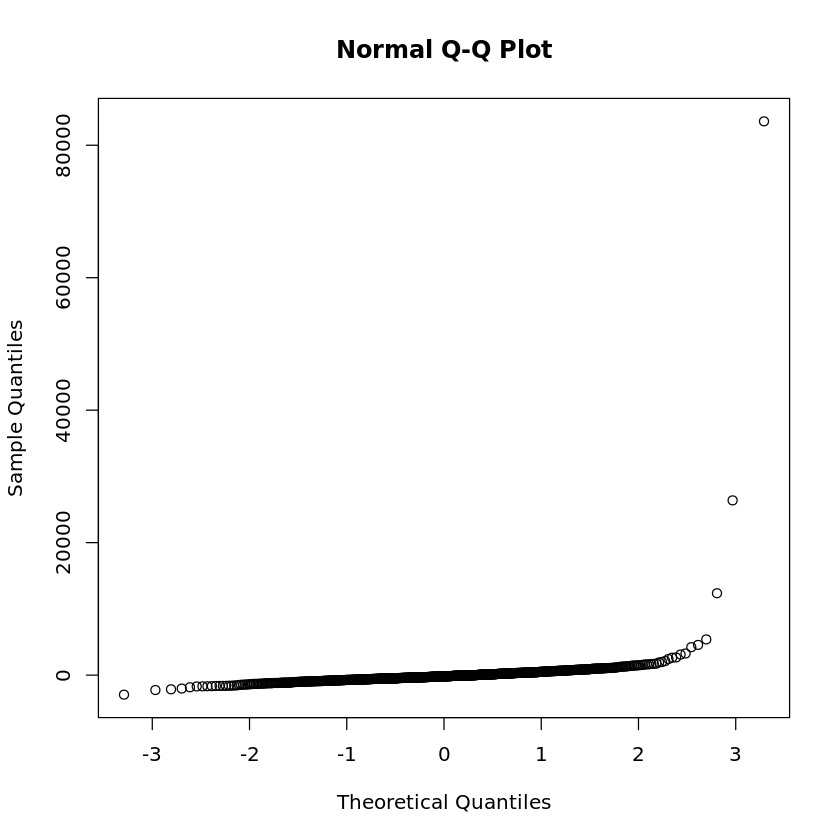

In [15]:
qqnorm(residuals(runtimeModel))
#abline(a=0, b=1)